In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def remove_zero_columns(data):
    for column in data.columns:
        if column == 'label':
            continue
        if data[column].sum() == 0:
            data.drop(column, axis=1, inplace=True)
    return data

In [4]:
def results(y_pred, y_test, labels):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    precision = precision_score(y_test, y_pred, average='weighted')
    print('Precision: ', precision)
    recall = recall_score(y_test, y_pred, average='weighted')
    print('Recall: ', recall)

    conf_matrix = confusion_matrix(y_test, y_pred)
    true_positive = np.diag(conf_matrix)
    print('True Positive: ', true_positive)

    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='g')  # 'g' format ensures that integers are displayed properly

    # Setting labels, title and ticks
    plt.ylabel('Actual', fontsize=12)
    plt.title('Confusion Matrix', fontsize=15)
    plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')  # Adjust tick positions and labels
    plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)

# SVM

data_svm shape (5000, 13)
Accuracy:  0.403
Precision:  0.4055826794433883
Recall:  0.403
True Positive:  [64 44 33 28 32 36 55 46 32 33]


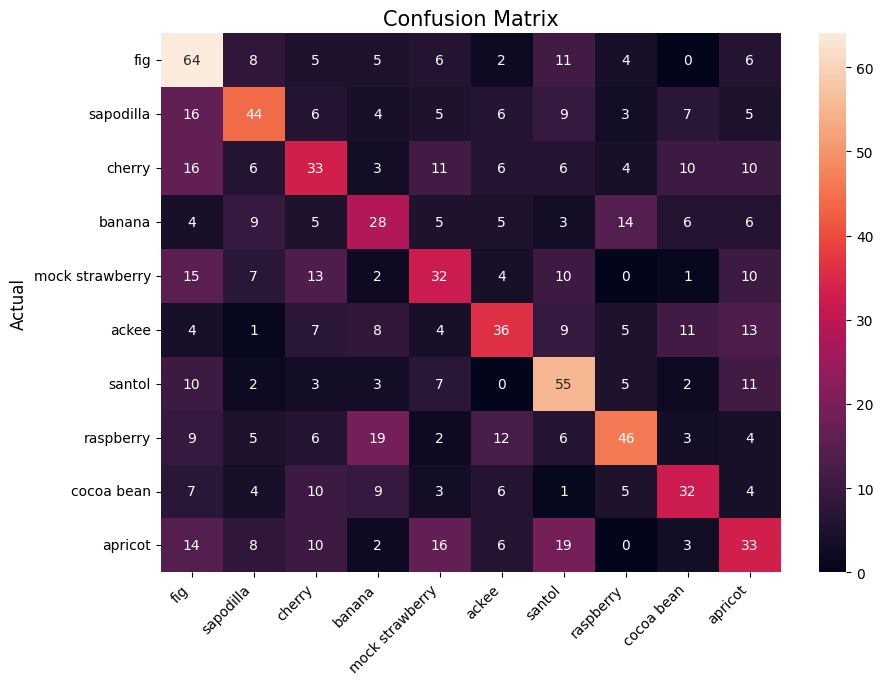

In [5]:
dominant_color = pd.read_csv('dominant_colors.csv')
histogram = pd.read_csv('histograms.csv')
texture = pd.read_csv('texture_features.csv')
labels = pd.read_csv('labels.csv')
shapes = pd.read_csv('shape_features.csv')

data_svm = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)

#creates a list of 10 random labels
import random

random_10 = random.sample(list(data_svm['label'].unique()), 10)
data_svm = data_svm[data_svm['label'].isin(random_10)]

data_svm = remove_zero_columns(data_svm)

print("data_svm shape",data_svm.shape)
#train svm model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data_svm.drop('label', axis=1)
y = data_svm['label']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='rbf', C=100, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# RANDOM FOREST with 20 Class

Accuracy:  0.294
Precision:  0.2984543660298091
Recall:  0.294
True Positive:  [28 15 19  9 36 33 28 24 26 10 16 24 59 32 60 31 51 35 23 29]


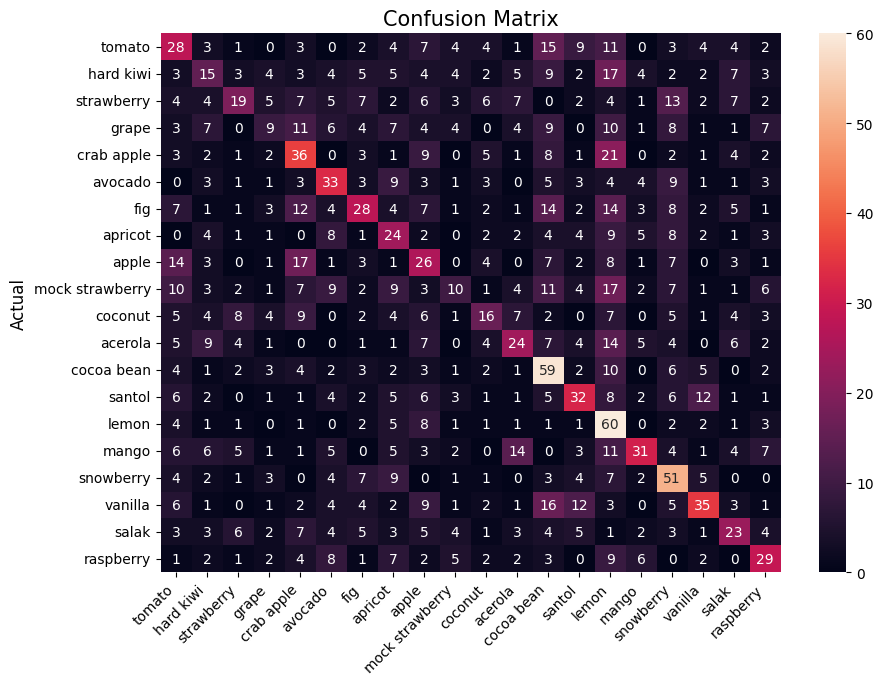

In [6]:
#train random forest model
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data_rf = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)

import random

random_20 = random.sample(list(data_rf['label'].unique()), 20)
data_rf = data_rf[data_rf['label'].isin(random_20)]

data_rf = remove_zero_columns(data_rf)
data_rf.dropna(inplace=True)



X = data_rf.drop('label', axis=1)
y = data_rf['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=3000, max_depth=25, random_state=42, criterion='gini', 
                             min_samples_split=2, min_samples_leaf=5, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_20)

# RANDOM FOREST with 10 class

Accuracy:  0.422
Precision:  0.4195925814850212
Recall:  0.422
True Positive:  [53 43 26 28 26 24 51 70 39 62]


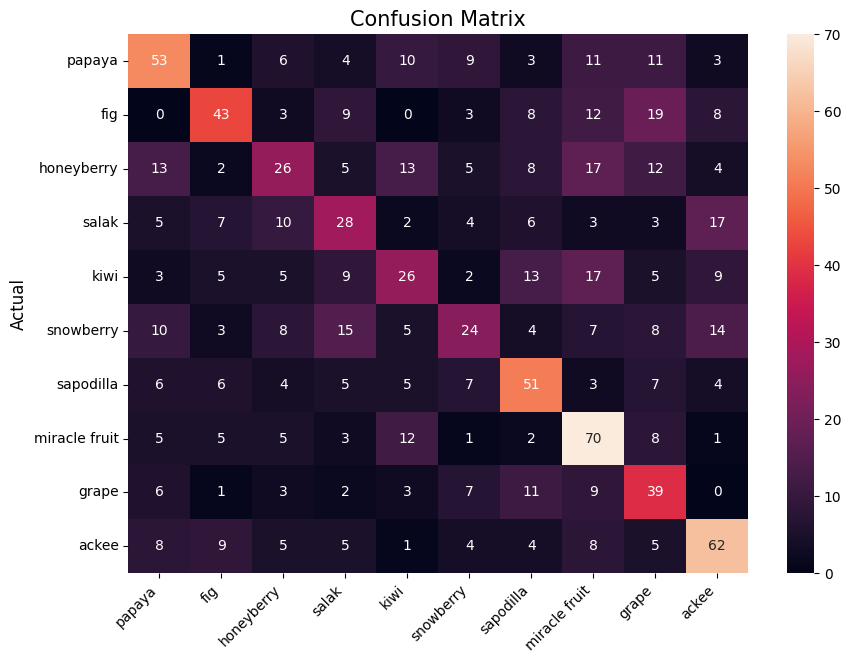

In [7]:
#train random forest model
from sklearn.ensemble import RandomForestClassifier
import numpy as np

data_rf = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)

import random

random_10 = random.sample(list(data_rf['label'].unique()), 10)
data_rf = data_rf[data_rf['label'].isin(random_10)]

data_rf = remove_zero_columns(data_rf)
data_rf.dropna(inplace=True)

X = data_rf.drop('label', axis=1)
y = data_rf['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=3000, max_depth=25, random_state=42, criterion='gini', 
                             min_samples_split=2, min_samples_leaf=5, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# KNN 20 Class

Accuracy:  0.2425
Precision:  0.24097834633622303
Recall:  0.2425
True Positive:  [38 15 33 30 28 17  8 35 19  9 14 20 46 22 33 46 22 28 12 10]


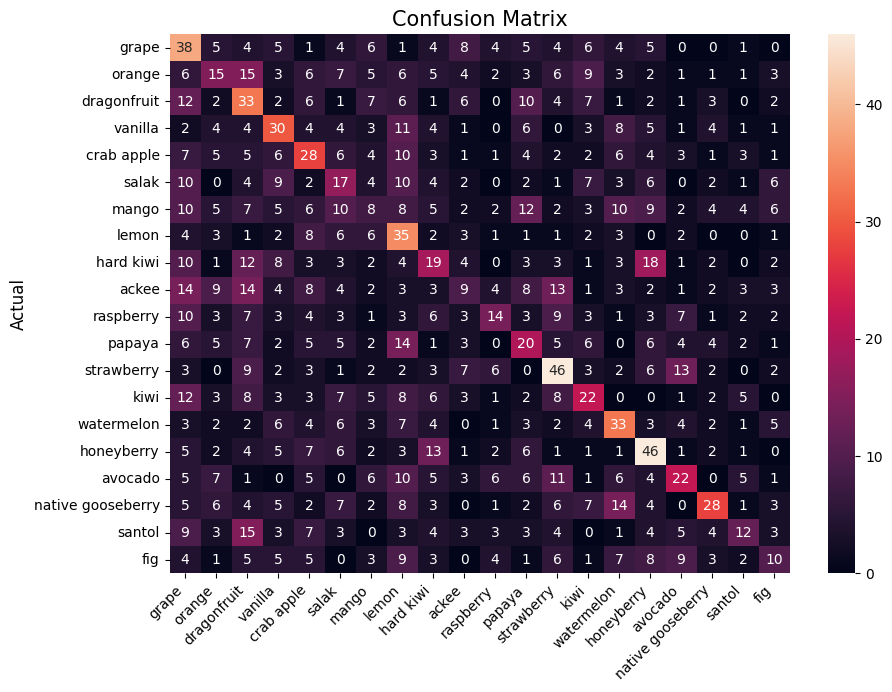

In [8]:
#train knn model
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

data_knn = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)

import random

random_20 = random.sample(list(data_knn['label'].unique()), 20)
data_knn = data_knn[data_knn['label'].isin(random_20)]

data_knn = remove_zero_columns(data_knn)

X = data_knn.drop('label', axis=1)
y = data_knn['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_20)

# KNN 10 Class

Accuracy:  0.351
Precision:  0.35646981548241874
Recall:  0.351
True Positive:  [22 34 31 40 45 31 39 57 25 27]


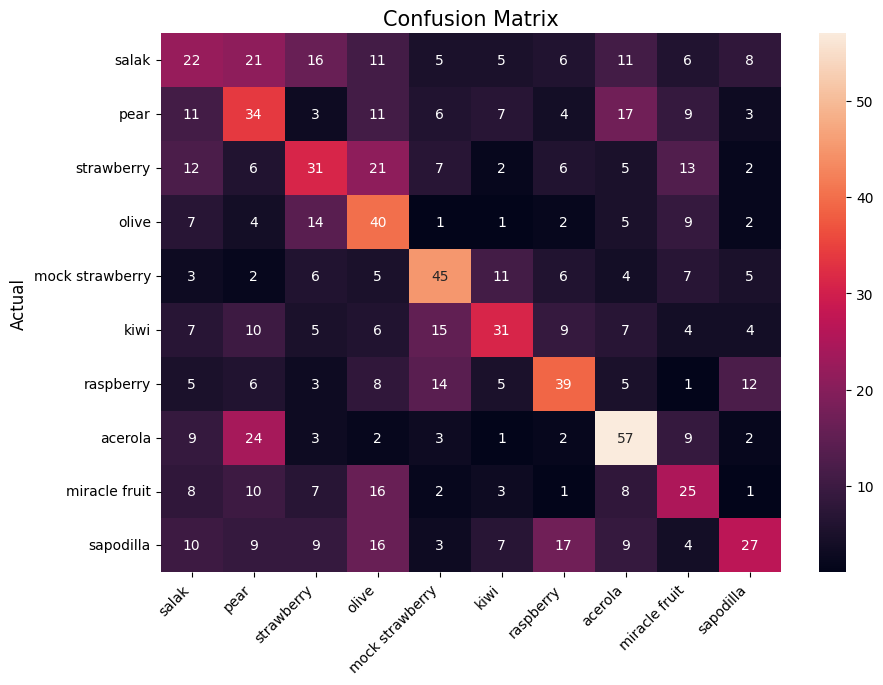

In [9]:
#train knn model
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

data_knn = pd.concat([texture,dominant_color,histogram, shapes,labels], axis=1)

import random

random_10 = random.sample(list(data_knn['label'].unique()), 10)
data_knn = data_knn[data_knn['label'].isin(random_10)]

data_knn = remove_zero_columns(data_knn)

X = data_knn.drop('label', axis=1)
y = data_knn['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

results(y_pred, y_test, random_10)

# XGBOOST 20 Class

Accuracy:  0.278
Precision:  0.2773887050006147
Recall:  0.278
True Positive:  [31 19 40 33 29 17 11 33 27 20 19 20 47 27 31 22 41 37 33 19]


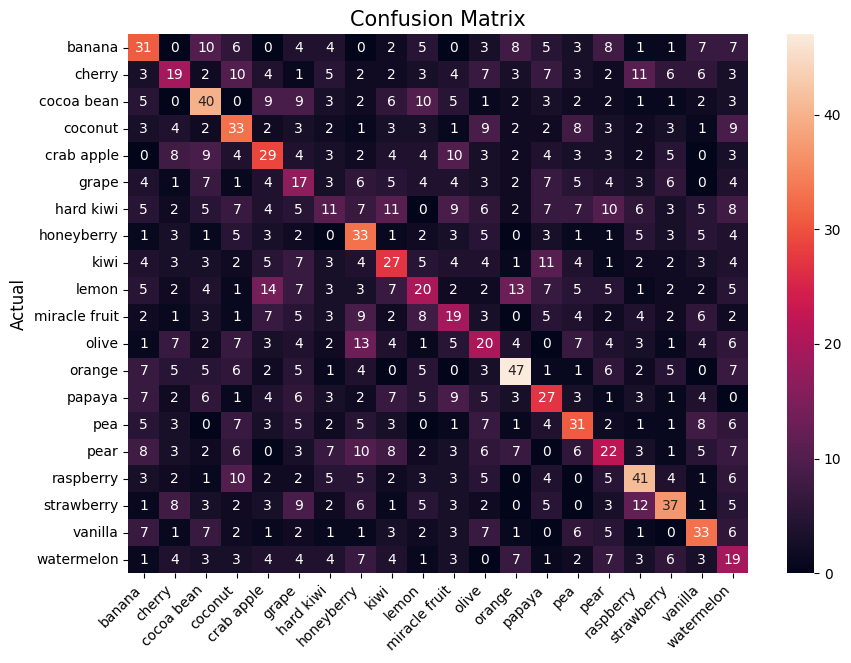

In [12]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

data_xgb = pd.concat([texture, dominant_color, histogram, shapes, labels], axis=1)

# Selecting 20 random labels
random_20 = random.sample(list(data_xgb['label'].unique()), 20)
data_xgb = data_xgb[data_xgb['label'].isin(random_20)]

# Assuming 'remove_zero_columns' is defined elsewhere
data_xgb = remove_zero_columns(data_xgb)

X = data_xgb.drop('label', axis=1)
y = data_xgb['label']

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = XGBClassifier(n_estimators=3000, max_depth=25, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

labels_for_plot = label_encoder.inverse_transform(sorted(np.unique(y_test)))
results(y_pred, y_test, labels_for_plot)

# XGBOOST 10 Class

Accuracy:  0.431
Precision:  0.4345842209921383
Recall:  0.431
True Positive:  [65 42 48 33 45 34 25 46 50 43]


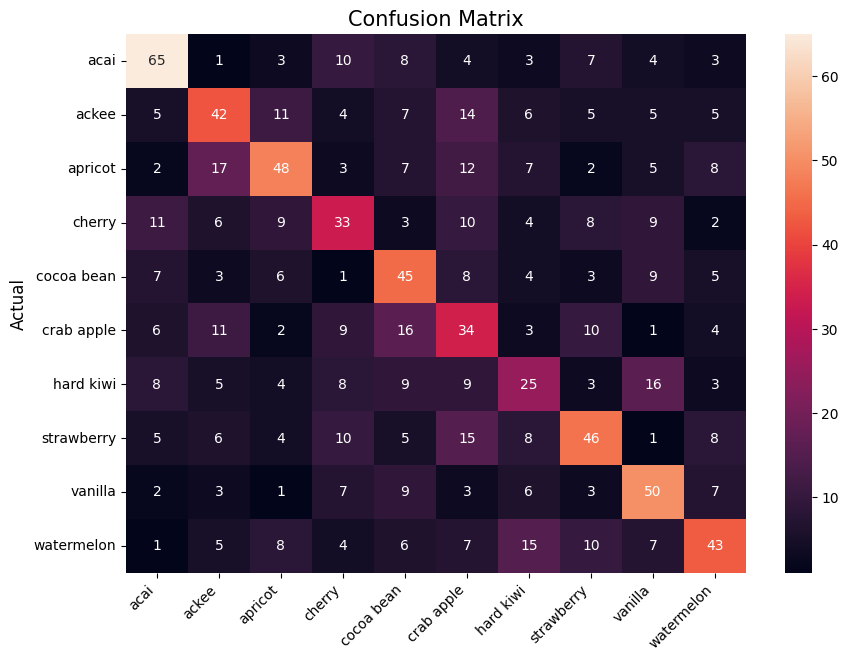

In [13]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

data_xgb = pd.concat([texture, dominant_color, histogram, shapes, labels], axis=1)

# Selecting 10 random labels
random_10 = random.sample(list(data_xgb['label'].unique()), 10)
data_xgb = data_xgb[data_xgb['label'].isin(random_10)]

# Assuming 'remove_zero_columns' is defined elsewhere
data_xgb = remove_zero_columns(data_xgb)

X = data_xgb.drop('label', axis=1)
y = data_xgb['label']

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = XGBClassifier(n_estimators=3000, max_depth=25, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

labels_for_plot = label_encoder.inverse_transform(sorted(np.unique(y_test)))
results(y_pred, y_test, labels_for_plot)